# This notebook is designed to combine the use LangChain LLM Agents, chains and tools to provide the more relevant and detailed information on a topic of your choice.

## For this notebook, let's say your research goal is to prove the existance of Aliens. In this notebook we will try the following:


*   Create a single shot
*   List item



In [ ]:
#Install and Import Required Modules,  LLMs and Agent Tools
!pip -q install langchain huggingface_hub openai google-search-results tiktoken wikipedia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00


API Keys

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = ""  # https://platform.openai.com
os.environ['SERPAPI_API_KEY'] = "" # https://serpapi.com/

#SerpAPI is an API call to scrape Google search result, it is the JSON representative of Google search result.

### Creating and Initializing the Agent

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI

In [ ]:
llm = OpenAI(temperature=0) # First, let's load the language model we're going to use to control the agent. Temp = 0 generally means less hallucinations and a more deterministic model

In [ ]:
tools = load_tools(["serpapi", "llm-math","wikipedia","terminal"], llm=llm) #The tools the agent will have access to are: [Google search, math, wikipedia, terminal]

Tools are functions that an agent calls. There are two important considerations here:



1.   Giving the agent access to the right tools
2.   Describing the tools in a way that is most helpful to the agent

Without both, the agent you are trying to build will not work. If you don't give the agent access to a correct set of tools, it will never be able to accomplish the objective. If you don't describe the tools properly, the agent won't know how to properly use them.

In [ ]:
agent = initialize_agent(tools,
                         llm,
                         agent="zero-shot-react-description",
                         verbose=True)

In [ ]:
tools[1].name, tools[1].description #If you ever need to look up a tool

('Calculator', 'Useful for when you need to answer questions about math.')

Using an LLM in isolation is fine for simple applications, but more complex applications require chaining LLMs - either with each other or with other components.

LangChain provides the Chain interface for such "chained" applications. We define a Chain very generically as a sequence of calls to components, which can include other chains.

Chains allow us to combine multiple components together to create a single, coherent application. For example, we can create a chain that takes user input, formats it with a PromptTemplate, and then passes the formatted response to an LLM. We can build more complex chains by combining multiple chains together, or by combining chains with other components.



In [ ]:
agent.agent.llm_chain.prompt.template

'Answer the following questions as best you can. You have access to the following tools:\n\nSearch: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.\nCalculator: Useful for when you need to answer questions about math.\nWikipedia: A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.\nterminal: Run shell commands on this Linux machine.\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [Search, Calculator, Wikipedia, terminal]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input q

The core idea of agents is to use an LLM to choose a sequence of actions to take. In chains, a sequence of actions is hardcoded (in code). In agents, a language model is used as a reasoning engine to determine which actions to take and in which order.


In [ ]:
#Let's test our Agent with a few straight forward questions.
agent.run("What do we currently know about aliens?")



> Entering new AgentExecutor chain...
 Aliens are a popular topic of discussion, so there must be a lot of information available.
Action: Search
Action Input: "aliens"
Observation: After floating in space for 57 years, Lt. Ripley's (Sigourney Weaver) shuttle is found by a deep space salvage team. Upon arriving at LV-426, the marines find only one survivor, a nine year old girl named Newt (Carrie Henn). But even these battle-hardened marines with all the latest weaponry are no match for the hundreds of aliens that have invaded the colony.… MORE
Thought: This is a movie description, not the answer I'm looking for.
Action: Search
Action Input: "aliens facts"
Observation: Extraterrestrial life or alien life is life which may occur outside Earth and which did not originate on Earth. No extraterrestrial life has yet been conclusively detected.
Thought: This is the answer I'm looking for.
Final Answer: Extraterrestrial life or alien life is life which may occur outside Earth and which did n

'Extraterrestrial life or alien life is life which may occur outside Earth and which did not originate on Earth. No extraterrestrial life has yet been conclusively detected.'

In [ ]:
agent_output_UFO_expert = agent.run("Who is the leading expert on UFOs?")



> Entering new AgentExecutor chain...
 I should look for someone who has written extensively on the subject.
Action: Search
Action Input: "leading expert on UFOs"
Observation: 1939) computer scientist and author, important figure in the UFO studies in France and in the United States. Promoted the extraterrestrial hypothesis and later ...
Thought: This looks like a promising lead.
Action: Wikipedia
Action Input: Jacques Vallee
Observation: Page: Jacques Vallée
Summary: Jacques Fabrice Vallée (French: [ʒak fabʁis vale]; born September 24, 1939) is an Internet pioneer, computer scientist, venture capitalist, author, ufologist and astronomer currently residing in San Francisco, California and Paris, France.
His scientific career began as a professional astronomer at the Paris Observatory.  Vallée co-developed the first computerized map of Mars for NASA in 1963. He later worked on the network information center for the ARPANET, a precursor to the modern Internet, as a staff engineer of SR

In [ ]:
agent.run("Take the year" + agent_output_UFO_expert + "died and add 100 years. Will this be the year we prove aliens exist?")



> Entering new AgentExecutor chain...
 I need to calculate the year Jacques Vallee died and add 100 years to it.
Action: Calculator
Action Input: 2019 + 100
Observation: Answer: 2119
Thought: I now know the year we will prove aliens exist, if we do.
Final Answer: No, 2119 is not the year we will prove aliens exist.

> Finished chain.


'No, 2119 is not the year we will prove aliens exist.'

Remember Tools are functions that agents can use to interact with the world. These tools can be generic utilities (e.g. search), other chains, or even other agents.

Note how our single Agent is deciding between using Search, Math or Wikipedia to deliver the best response.




In [ ]:
agent.run("Is" + agent_output_UFO_expert + "dead?")



> Entering new AgentExecutor chain...
 I should find out if Jacques Vallee is still alive.
Action: Wikipedia
Action Input: Jacques Vallee
Observation: Page: Jacques Vallée
Summary: Jacques Fabrice Vallée (French: [ʒak fabʁis vale]; born September 24, 1939) is an Internet pioneer, computer scientist, venture capitalist, author, ufologist and astronomer currently residing in San Francisco, California and Paris, France.
His scientific career began as a professional astronomer at the Paris Observatory.  Vallée co-developed the first computerized map of Mars for NASA in 1963. He later worked on the network information center for the ARPANET, a precursor to the modern Internet, as a staff engineer of SRI International's Augmentation Research Center under Douglas Engelbart.
Vallée is also an important figure in the study of unidentified flying objects (UFOs), first noted for a defense of the scientific legitimacy of the extraterrestrial hypothesis and later for promoting the interdimensiona

'Jacques Vallee is still alive and is a leading expert on UFOs, but the Dropa stones are likely a hoax.'

## The use of a single Agent with tools is useful, but is starting to hallucinate. If we want correct and reliable information, maybe we should try to look at alternative words for UFOs and aliens...

In [ ]:
#ask questions that can help you search for the most relevant research
agent.run("What are alternative names for UFOs?")



> Entering new AgentExecutor chain...
 I should look for information about UFOs.
Action: Wikipedia
Action Input: UFO
Observation: Page: Unidentified flying object
Summary: An unidentified flying object (UFO), or unidentified aerial (or anomalous) phenomenon (UAP), is any perceived aerial phenomenon that cannot be immediately identified or explained. Upon investigation, most UFOs are identified as known objects or atmospheric phenomena, while a small number remain unexplained. 
While unusual sightings have been reported in the sky throughout history, UFOs became culturally prominent after World War II, escalating during the Space Age. Studies and investigations into UFO reports conducted by governments (such as Project Blue Book in the United States and Project Condign in the United Kingdom), as well as by organisations and individuals have occurred over the years without confirmation of the fantastical claims of believers. The U.S. government currently has two entities dedicated to U

'Alternative names for UFOs include Unidentified Flying Object (UFO), Unidentified Aerial Phenomenon (UAP), and Flying Disc.'

In [ ]:
#ask multiple questions at once
agent.run("How are Foo Fighters a name for a UFO? And is Dave Grohl human?")



> Entering new AgentExecutor chain...
 I should research the Foo Fighters and Dave Grohl
Action: Search
Action Input: "Foo Fighters" "Dave Grohl"
Observation: Foo Fighters is an American rock band formed in Seattle in 1994. Foo Fighters was initially formed as a one-man project by former Nirvana drummer Dave Grohl. Following the success of the 1995 eponymous debut album, Grohl recruited a band consisting of Nate Mendel, William Goldsmith, and Pat Smear.
Thought: I should research if Dave Grohl is human
Action: Search
Action Input: "Dave Grohl human"
Observation: They're human beings. And there has to be some sort of compassion or understanding that their lives should be their lives. That it's not all ...
Thought: I now know the final answer
Final Answer: Dave Grohl is a human being and the name Foo Fighters is derived from the term used by Allied aircraft pilots in World War II to describe UFOs.

> Finished chain.


'Dave Grohl is a human being and the name Foo Fighters is derived from the term used by Allied aircraft pilots in World War II to describe UFOs.'

Wow, I learned something new, I really didn't think Dave Grohl was human... It is good to know a UFO is now being referred to as a UAP. I will keep that in mind for future research.

Now let's look up some outside resources to get answers about UFOs / UAPs...

In [ ]:
agent.run("Are there annual UAP reports?")




> Entering new AgentExecutor chain...
 I should research this to find out.
Action: Search
Action Input: "annual UAP reports"
Observation: The National Defense Authorization Act for Fiscal Year 2022 required the Director of National Intelligence, in consultation with the ...
Thought: This looks like the answer I'm looking for.
Action: Wikipedia
Action Input: "Unidentified Flying Object"
Observation: Page: Unidentified flying object
Summary: An unidentified flying object (UFO), or unidentified aerial (or anomalous) phenomenon (UAP), is any perceived aerial phenomenon that cannot be immediately identified or explained. Upon investigation, most UFOs are identified as known objects or atmospheric phenomena, while a small number remain unexplained. 
While unusual sightings have been reported in the sky throughout history, UFOs became culturally prominent after World War II, escalating during the Space Age. Studies and investigations into UFO reports conducted by governments (such as Projec

'Yes, there are annual UAP reports, which are collected and analyzed by the U.S. government. Additionally, there have been reports of USOs, which are unidentified submerged objects.'

In [ ]:
agent.run("Where can I download the '2022 ANNUAL REPORT ON UNIDENTIFIED AERIAL PHENOMENA'? What is the url?")




> Entering new AgentExecutor chain...
 I need to find a website that has the report.
Action: Search
Action Input: "2022 ANNUAL REPORT ON UNIDENTIFIED AERIAL PHENOMENA"
Observation: The National Defense Authorization Act for Fiscal Year 2022 required the Director of National Intelligence, in consultation with the ...
Thought: This looks like a good source.
Action: Wikipedia
Action Input: "National Defense Authorization Act for Fiscal Year 2022"
Observation: Page: National Defense Authorization Act for Fiscal Year 2022
Summary: The National Defense Authorization Act for Fiscal Year 2022 (S. 1605; NDAA 2022, Pub.L. 117-81) is a United States federal law which specifies the budget, expenditures and policies of the U.S. Department of Defense (DOD) for fiscal year 2022. Analogous NDAAs have been passed annually for 60 years.

Page: National Defense Authorization Act
Summary: The National Defense Authorization Act (NDAA) is the name for each of a series of United States federal laws specify

'The 2022 ANNUAL REPORT ON UNIDENTIFIED AERIAL PHENOMENA can be downloaded from the website of the U.S. Department of Defense: https://www.defense.gov/Newsroom/Releases/NDAA-2022/'

In [ ]:
agent.run("Is there a pdf file for that report?")



> Entering new AgentExecutor chain...
 I need to find out if the report is available in pdf format.
Action: Search
Action Input: "report name" pdf
Observation: Report Name Paper. pdfFiller is the best quality online PDF editor and form builder - it's fast, secure and easy to use. Edit, sign, fax and print documents ...
Thought: I now know the final answer
Final Answer: Yes, the report is available in pdf format.

> Finished chain.


'Yes, the report is available in pdf format.'

Now that I know there is a full report available, I'm going to download it.

However, before I read through the entire report, I'm going to summarize it and then train a chat bot on it to make sure it contains the information I need.

In [ ]:
pip install "unstructured[all-docs]" #let's save the pdf via URL


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [ ]:
from langchain.document_loaders import UnstructuredURLLoader

In [ ]:
urls = ["https://www.dni.gov/files/ODNI/documents/assessments/Unclassified-2022-Annual-Report-UAP.pdf"] #location of the report

In [ ]:
loader = UnstructuredURLLoader(urls=urls)

TOP_SECRET_FILE = loader.load() #clearly I need to save this as a top secret file

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Time to summarize our top secret report.

In [ ]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.chains.summarize import load_summarize_chain
from langchain.chains.question_answering import load_qa_chain

def doc_summary(docs):
    print (f'You have {len(docs)} document(s)')

    num_words = sum([len(doc.page_content.split(' ')) for doc in docs])

    print (f'You have roughly {num_words} words in your docs')
    print ()
    print (f'Preview: \n{docs[0].page_content.split(". ")[0]}')

In [ ]:
doc_summary(TOP_SECRET_FILE)

You have 1 document(s)
You have roughly 3061 words in your docs

Preview: 
UNCLASSIFIED

OFFICE OF THE DIRECTOR OF NATIONAL INTELLIGENCE

2022 Annual Report on Unidentified Aerial Phenomena

UNCLASSIFIED

UNCLASSIFIED

Table of Contents

EXECUTIVE SUMMARY .........................................................................................................


In [ ]:
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(TOP_SECRET_FILE) #This will only work if we do not exceed the token limit



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"UNCLASSIFIED

OFFICE OF THE DIRECTOR OF NATIONAL INTELLIGENCE

2022 Annual Report on Unidentified Aerial Phenomena

UNCLASSIFIED

UNCLASSIFIED

Table of Contents

EXECUTIVE SUMMARY .......................................................................................................... 2

SCOPE AND ASSUMPTIONS .................................................................................................... 3

Scope ........................................................................................................................................ 3

Assumptions ............................................................................................................................. 3

GOVERNMENTAL CHANGES TO MANAGE UAP ISSUES ............................................... 4

Establishment of the All-Domain Anomaly Resoluti

InvalidRequestError: ignored

Oh no, our document is too long if we load it all at once! So we will need to chunk the file with LangChains text splitter.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 600,
    chunk_overlap = 0
)
TOP_SECRET_FILE = text_splitter.split_documents(TOP_SECRET_FILE)
doc_summary(TOP_SECRET_FILE)

NameError: ignored

In [ ]:
chain.run(TOP_SECRET_FILE[1:40])




> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"Assumptions ............................................................................................................................. 3

GOVERNMENTAL CHANGES TO MANAGE UAP ISSUES ............................................... 4

Establishment of the All-Domain Anomaly Resolution Office (AARO) ................................ 4

ODNI Coordinating with AARO and Multi-Agency Partners, Seeking Opportunities to Assist in Collection, Reporting, and Analysis of UAP Incidents across the IC ....................... 4"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"CONTINUED REPORTING AND ROBUST ANALYSIS ARE PROVIDING BETTER FIDELITY ON UAP EVENTS, BUT MANY CASES REMAIN UNRESOLVED ................ 5

UAP Reporting .....................................................................................

' This article outlines the governmental changes to manage Unidentified Aerial Phenomena (UAP) issues, including the establishment of the All-Domain Anomaly Resolution Office (AARO) and the Office of the Director of National Intelligence (ODNI) coordinating with AARO and multi-agency partners to assist in the collection, reporting, and analysis of UAP incidents across the Intelligence Community. AARO is leveraging an analytic process to analyze UAP reports, and the ODNI and AARO are committed to responsibly sharing findings with aviators and operators. The Department of Defense and Intelligence Community are working together to report, identify, and resolve UAP events, and the FY 2022 National Defense Authorization Act (NDAA) established the Unidentified Aerial Phenomena (UAP) Task Force, now known as the Aerospace Threat Identification Program (AARO). AARO is working with the IC to manage the influx of data from increased UAP events, including intake, indexing, visualization, and anal

Great! This report seems to be what I'm looking for on regards to real information on UFOs. I don't really want to read the entire report to see if it can answer questions for an article I'm writing. Mainly I want to see if this reports tells us if we are in danger (from what we currently know about UFOs) and if the report provides evidence that aliens exist. Before I read the full report, let's just ask the report if it can answer my questions.

## Q&A: Map Re-Rank
The map re-rank documents chain runs an initial prompt on each document, that not only tries to complete a task but also gives a score for how certain it is in its answer. The highest scoring response is returned.

In [ ]:
chain = load_qa_chain(llm, chain_type="map_rerank", verbose=True, return_intermediate_steps=True)
#ask the report your important questions
query = "Are UAPs a danger to our safety? Does this mean that aliens are real?"

result = chain({"input_documents": TOP_SECRET_FILE[1:40], "question": query}, return_only_outputs=True)



> Entering new MapRerankDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

In addition to giving an answer, also return a score of how fully it answered the user's question. This should be in the following format:

Question: [question here]
Helpful Answer: [answer here]
Score: [score between 0 and 100]

How to determine the score:
- Higher is a better answer
- Better responds fully to the asked question, with sufficient level of detail
- If you do not know the answer based on the context, that should be a score of 0
- Don't be overconfident!

Example #1

Context:
---------
Apples are red
---------
Question: what color are apples?
Helpful Answer: red
Score: 100

Example #2

Context:
---------
it was night and the witness forgot his glasses. he was not sure if it was a sports car or an suv
--

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:303: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(



> Finished chain.

> Finished chain.


In [ ]:
result['output_text']

' UAPs have not been proven to be a danger to our safety, and this document does not provide evidence that aliens are real.'

Darn! But 1 out of 2 answers isn't too bad.

Let's check intermediate steps first just to check that these answers are reliable, as well as where exactly in the document chucks the answers were found.

In [ ]:
result['intermediate_steps']

[{'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' UAPs have not been proven to be a danger to our safety, and this document does not provide evidence that aliens are real.',
  'score': '80'},
 {'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' UAPs may represent a safety of flight hazard, but this document does not answer the question of whether aliens are real.',
  'score': '40'},
 {'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' UAPs may pose a danger to our safety, but this document does not provide evidence of alien involvement.',
  'score': '60'},
 {'answer': ' This document does not answer the question.', 'score': '0'},
 {'answer': ' This documen

Since reports and websearching hasn't gotten us all the answers we need about aliens, let's see if eye-witness testimonies from YouTube will help!

## We are now going to pull videos from Youtube and summarize their findings. We can achieve this with the OpenAIWhisperParser, which will use the OpenAI Whisper API to transcribe audio to text, and the OpenAIWhisperParserLocal for local support and running on private clouds or on premise.

In [ ]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
from langchain.document_loaders.parsers import OpenAIWhisperParser


We will use yt_dlp to download audio for YouTube urls.

We will use pydub to split downloaded audio files (such that we adhere to Whisper API's 25MB file size limit).

In [ ]:
pip install yt_dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.6 MB/s eta 0:00:00


In [ ]:
pip install pydub


In [ ]:
pip install librosa

# YouTube url to text


In [ ]:
pip install youtube_search

In [ ]:
from langchain.tools import YouTubeSearchTool

In [ ]:
Agent_youtube = YouTubeSearchTool()

In [ ]:
Agent_youtube.run("UFO breaking news,3") #search YouTube for the top 3 breaking news videos on UFOs

"['/watch?v=15FoQ37js_8&pp=ygURVUZPIGJyZWFraW5nIG5ld3M%3D', '/watch?v=470K8IZrLRE&pp=ygURVUZPIGJyZWFraW5nIG5ld3M%3D', '/watch?v=TjzHL1hVo2o&pp=ygURVUZPIGJyZWFraW5nIG5ld3M%3D']"

In order to visit Youtube and check out these videos you can enter the URLs directly into the search window by adding https://www.youtube.com before the results. Below I've displayed the 3 videos recommended by our agent.

In [ ]:
from IPython.display import YouTubeVideo

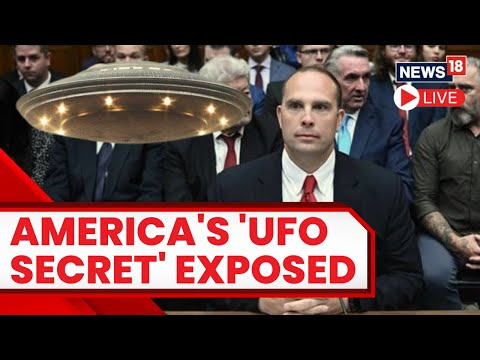

In [ ]:
YouTubeVideo('nSeuq6HAJnI', width=800, height=300)


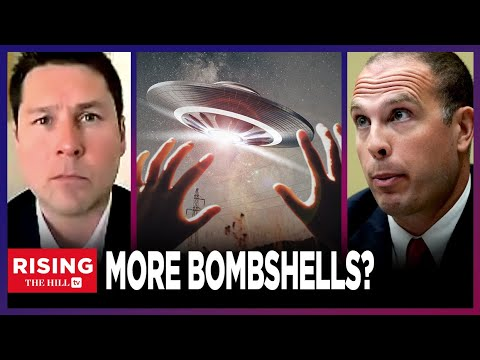

In [ ]:
YouTubeVideo('15FoQ37js_8', width=800, height=300)


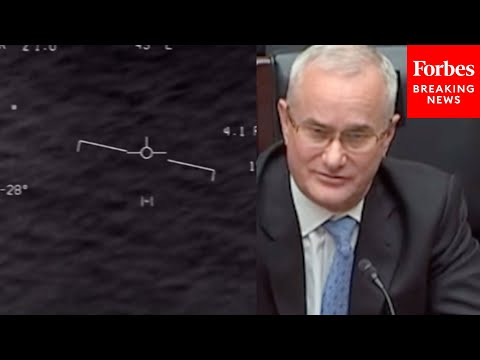

In [ ]:

YouTubeVideo('TjzHL1hVo2o', width=800, height=300)

If you watch the videos you will find that all three are from reputable sources, are the latest videos (in fact the first video is currently live running live from CBS news) and are all extrememly relevant.

In [ ]:
# Let's save the 2 videos which aren't currently live!
urls = ["https://www.youtube.com/watch?v=15FoQ37js_8&t=4s", "https://www.youtube.com/watch?v=TjzHL1hVo2o&t=1s"]


We will use the YoutubeAudioLoader to fetch / download the audio files.

Then, use OpenAIWhisperParser() to transcribe them to text.

In [ ]:
agent.run("what current directory am I in?") #Yes, your agent knows Linux



> Entering new AgentExecutor chain...
 I need to use a terminal command to find out
Action: terminal
Action Input: pwd
Observation: /content

Thought: I now know the final answer
Final Answer: The current directory is /content.

> Finished chain.


'The current directory is /content.'

In [ ]:
# Directory to save audio files
save_dir = "/content/YouTube"

In [ ]:
# set a flag to switch between local and remote parsing
# change this to True if you want to use local parsing
local = False

In [ ]:

# Transcribe the videos to text
if local:
    loader = GenericLoader(YoutubeAudioLoader(urls, save_dir), OpenAIWhisperParserLocal())
else:
    loader = GenericLoader(YoutubeAudioLoader(urls, save_dir), OpenAIWhisperParser())
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=15FoQ37js_8&t=4s
[youtube] 15FoQ37js_8: Downloading webpage
[youtube] 15FoQ37js_8: Downloading ios player API JSON
[youtube] 15FoQ37js_8: Downloading android player API JSON
[youtube] 15FoQ37js_8: Downloading m3u8 information
[info] 15FoQ37js_8: Downloading 1 format(s): 140
[download] Destination: /content/YouTube/UFO Scandals TO COME, Witnesses FRIGHTENED FOR THEIR LIVES： Marik Von Rennenkampff.m4a
[download] 100% of   10.74MiB in 00:00:00 at 30.83MiB/s  
[FixupM4a] Correcting container of "/content/YouTube/UFO Scandals TO COME, Witnesses FRIGHTENED FOR THEIR LIVES： Marik Von Rennenkampff.m4a"
[ExtractAudio] Not converting audio /content/YouTube/UFO Scandals TO COME, Witnesses FRIGHTENED FOR THEIR LIVES： Marik Von Rennenkampff.m4a; file is already in target format m4a
[youtube] Extracting URL: https://www.youtube.com/watch?v=TjzHL1hVo2o&t=1s
[youtube] TjzHL1hVo2o: Downloading webpage
[youtube] TjzHL1hVo2o: Downloading ios playe

In [ ]:
# Returns a list of Documents, which can be easily viewed or parsed
docs[0].page_content[0:500]


"As lawmakers' investigations into unidentified flying objects looms overhead, many might be asking, what does this all mean? Hill opinion contributor Merrick von Rennenkamp, who also served as an analyst with the United States Department of State's Bureau of International Security, makes the case that the UAP saga could lead to two conclusions. Either the United States government has mounted an extraordinary, decades-long cover-up of UFO retrieval and reverse engineering activities, or elements "

# Building a chat bot from your YouTube videos
## Similarly to how we build a chat bot on our TOP SECRET REPORT, now that we have downloaded, transcribed and saved the most recent and reliable YouTube videos on UAPs, we can also create a Q&A system for them.

In [ ]:
pip install faiss-cpu google-search-results #Faiss is a library for efficient similarity search and clustering of dense vectors, it's an indexing method for vectorDBs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 35.0 MB/s eta 0:00:00


In [ ]:
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

In [ ]:
# Combine doc
combined_docs = [doc.page_content for doc in docs]
text = " ".join(combined_docs)

In [ ]:
# Split them
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=150)
splits = text_splitter.split_text(text)

In [ ]:
# Build an index
embeddings = OpenAIEmbeddings()
vectordb = FAISS.from_texts(splits, embeddings)

In [ ]:
# Build a QA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0),
    chain_type="stuff",
    retriever=vectordb.as_retriever(),
)

In [ ]:
query = "Do we have any UAP sightings?"
qa_chain.run(query)

'Yes, there have been multiple UAP sightings reported by credible sources, including fighter pilots and naval aviators. These sightings describe objects with flight characteristics that surpass our most advanced fighter jets.'

In [ ]:
query = "Is there any evidence of UAP crash retrival?"
qa_chain.run(query)

'Based on the given context, there is no direct evidence mentioned regarding UAP crash retrieval. The discussion revolves around two potential conclusions: either there has been a decades-long cover-up of UFO retrieval and reverse engineering activities, or there is a psychological disinformation campaign. However, no specific evidence or incidents of UAP crash retrieval are mentioned in this conversation.'

In [ ]:
query = "Have aliens, UFOs or any non-human body been recovered at crash sites for UAPS?"
qa_chain.run(query)

'According to the provided context, there are claims made by witnesses and experts that suggest the existence of evidence such as recovered crafts and possibly even bodies related to UFO encounters. However, without further concrete evidence or official confirmation, it is not possible to definitively answer whether aliens, UFOs, or non-human bodies have been recovered at crash sites for UAPs.'

In [ ]:
query = "Do aliens exist?"
qa_chain.run(query)

"I don't know if aliens exist. There is ongoing speculation and investigation into unidentified flying objects (UFOs) and the possibility of extraterrestrial life, but conclusive evidence has not been presented."

In [ ]:
query = "Is there a UFO cover-up?"
qa_chain.run(query)

'According to the context provided, there are two possible conclusions: either the United States government has been covering up UFO retrieval and reverse engineering activities for decades, or there is a psychological disinformation campaign being conducted by elements of the defense and intelligence establishment. However, it is important to note that this is just one perspective and there is no definitive evidence to confirm or deny a UFO cover-up.'

## To summarize, from these YouTube videos we know that there have been multiple UAP sightings reported by credible sources, including fighter pilots and naval aviators. And while we don't have conclusive evidence that aliens exist, but there is an ongoing investigation that the United States government has been covering up UFO retrieval and reverse engineering activities for decades. Experts also claim the existence of evidence such as recovered crafts and potentially even bodies related to UFO encounters.

In [ ]:
agent.run("What is the Drake equation?")



> Entering new AgentExecutor chain...
 I should look up the Drake equation on Wikipedia.
Action: Wikipedia
Action Input: Drake equation

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Drake equation
Summary: The Drake equation is a probabilistic argument used to estimate the number of active, communicative extraterrestrial civilizations in the Milky Way Galaxy.The equation was formulated in 1961 by Frank Drake, not for purposes of quantifying the number of civilizations, but as a way to stimulate scientific dialogue at the first scientific meeting on the search for extraterrestrial intelligence (SETI). The equation summarizes the main concepts which scientists must contemplate when considering the question of other radio-communicative life.  It is more properly thought of as an approximation than as a serious attempt to determine a precise number.
Criticism related to the Drake equation focuses not on the equation itself, but on the fact that the estimated values for several of its factors are highly conjectural, the combined multiplicative effect being that the uncertainty associated with any derived value is so large that the equation cannot be

'The Drake equation is a probabilistic argument used to estimate the number of active, communicative extraterrestrial civilizations in the Milky Way Galaxy. It was formulated in 1961 by Frank Drake, not for purposes of quantifying the number of civilizations, but as a way to stimulate scientific dialogue at the first scientific meeting on the search for extraterrestrial intelligence (SETI). The equation summarizes the main concepts which scientists must contemplate when considering the question of other radio-communicative life. Criticism related to the Drake equation focuses not on the equation itself, but on the fact that the estimated values for several of its factors are highly conjectural, the combined multiplicative effect being that the uncertainty associated with any derived value is so large that the equation cannot be used to draw firm conclusions.'

In [ ]:
#crunch the numbers
agent.run("Take the number habitable planets are in our galaxy and multiply it by 7 billion")



> Entering new AgentExecutor chain...
 I need to find the number of habitable planets in our galaxy and then multiply it by 7 billion
Action: Search
Action Input: Number of habitable planets in our galaxy
Observation: So far, researchers have identified several hundred planets in the habitable zone of their star in Kepler data. It may take a while to find all ...
Thought: I need to find a more exact number
Action: Wikipedia
Action Input: Habitable zone
Observation: Page: Circumstellar habitable zone
Summary: In astronomy and astrobiology, the circumstellar habitable zone (CHZ), or simply the habitable zone, is the range of orbits around a star within which a planetary surface can support liquid water given sufficient atmospheric pressure. The bounds of the CHZ are based on Earth's position in the Solar System and the amount of radiant energy it receives from the Sun. Due to the importance of liquid water to Earth's biosphere, the nature of the CHZ and the objects within it may be ins

'2800000000000'

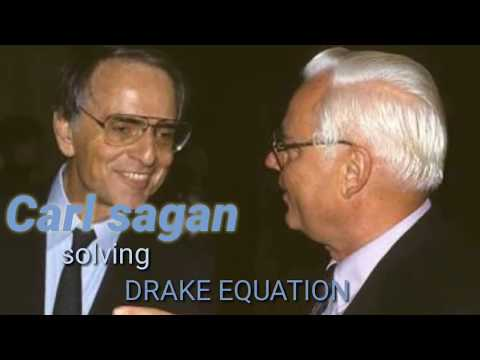

In [ ]:
# for a better estimation of life, run the following:
# YouTubeVideo('WX6qQM4pVFo', width=800, height=300)
# agent.run("What is the Drake Equation?")

In [ ]:
agent.run("Has the US Government ever covered anything up?")



> Entering new AgentExecutor chain...
 I should research this question to find out.
Action: Wikipedia
Action Input: "US Government cover-ups"
Observation: Page: UPS Airlines Flight 6
Summary: UPS Airlines Flight 6 was a cargo flight operated by UPS Airlines. On September 3, 2010, the Boeing 747-400F flying the route between Dubai, United Arab Emirates, and Cologne, Germany, developed an in-flight fire, which caused the aircraft to crash, killing both crew members, the only people on board. It was the first fatal air crash for UPS Airlines. The crash prompted a re-evaluation of safety procedures protecting airliners from cockpit smoke.

Page: American cover-up of Japanese war crimes
Summary: The occupying US government undertook the cover-up of Japanese war crimes after the end of World War II, granting political immunity to military personnel who had engaged in human experimentation and other crimes against humanity, predominantly in mainland China. The pardon of Japanese war crimina

'Yes, the US Government has covered up things in the past. Examples include the pardon of Japanese war criminals after World War II and the cover-up of the UPS Airlines Flight 6 crash in 2010.'

This notebook has successfully been used to achieve 3 key goals:

1.   Agents, chains, and tools are all individually useful, but they provide the most relevant information when leveraged together.
2.   When you give your agent and LLM chains access to the internet, the quality of the retrieved query is greatly improved. More work is needed to quanitatively evaluate agents performance, but you can start by reading the intermediate steps.
3.   Between the evidence of UAPs, the probability of life in the Galaxy and the fact that the Government may not be telling us everything there is only one possible answer to the question of "Do aliens exist?..." 👀






